In [1]:
'''
#elec load
df = pd.read_csv("C:/Users/Sejong/OneDrive - Sejong University/바탕 화면/data/202306_IITP_RAW_DATA/ELEC_RAW.csv", header=None).reset_index(drop = True)
df = df[[0, 1, 2]]
df.rename(columns = {0: 'house_index', 1:'date', 2:'elec_accu'}, inplace = True)
df['date'] = pd.to_datetime(df['date'])
for i in range(1, 349):
    file = df[df['house_index']==i]
    globals()["elec_df{}".format(i)]= file

#water load
df = pd.read_csv("C:/Users/Sejong/OneDrive - Sejong University/바탕 화면/data/202306_IITP_RAW_DATA/WATER_RAW.csv", header=None).reset_index(drop = True)
df = df[[0, 1, 2]]
df.rename(columns = {0: 'house_index', 1:'date', 2:'water_accu'}, inplace = True)

#date string 분해
df['Y'] = df.date.str.split('-').str[0]
df['M'] = df.date.str.split('-').str[1]
df['D'] = df.date.str.split('-').str[2]
df['h'] = df.date.str.split(':').str[0]
df['m'] = df.date.str.split(':').str[1]
df['s'] = df.date.str.split(':').str[2]
df['h'] = df.h.str.split(' ').str[1]
df['D'] = df.D.str.split(' ').str[0]

df = df.astype({'Y':'int64', 'M':'int64', 'D':'int64', 'h':'int64', 'm':'int64', 's':'int64'})

#date 예외 제거
df = df[df['m']<60]
df = df[df['h']<24]
df = df[df['s']<60]

#date to datetime
df['date'] = pd.to_datetime(df['date'])
for i in range(1, 349):
    file = df[df['house_index']==i]
    globals()["water_df{}".format(i)]= file


#1시간 단위로 변환
for j in range(1, 349):
    date = pd.date_range("2022-10-01 00:00:00", "2023-03-28 00:00:00", freq='1h')
    null_df = pd.DataFrame(columns=['house_index', 'date', 'elec_accu'])
    null_df['date'] = date
    for i in range(len(null_df)):
        try:
            a = null_df.loc[i, 'date']
            b = null_df.loc[i+1, 'date']

            per1h = eval('elec_df'+str(j))[eval('elec_df'+str(j))['date'].between(a, b)]
            total = per1h['elec_accu'].max()
            null_df.loc[i+1, 'elec_accu'] = total

            per1h = eval('water_df'+str(j))[eval('water_df'+str(j))['date'].between(a, b)]
            total = per1h['water_accu'].max()
            null_df.loc[i+1, 'water_accu'] = total

        except:
            print(j)
    null_df['house_index'] = j
    null_df = null_df.dropna(axis = 0)
    globals()["total_df{}".format(j)]= null_df


#모든 house index 병합
li = []
for i in range(1, 349):
    x = eval('total_df'+str(i))
    #x['lag1_usage'] = x['usage'].shift(1)
    #x['lag2_usage'] = x['usage'].shift(2)
    x['elec_usage'] = x.elec_accu.diff(periods = 1)
    x['water_usage'] = x.water_accu.diff(periods = 1)
    x = x.dropna(axis = 0)
    li.append(x)
print(li)

data = pd.concat(li, ignore_index=True)

data.to_csv("C:/Users/Sejong/Downloads/total_data(elec, water).csv")
'''

'\n#elec load\ndf = pd.read_csv("C:/Users/Sejong/OneDrive - Sejong University/바탕 화면/data/202306_IITP_RAW_DATA/ELEC_RAW.csv", header=None).reset_index(drop = True)\ndf = df[[0, 1, 2]]\ndf.rename(columns = {0: \'house_index\', 1:\'date\', 2:\'elec_accu\'}, inplace = True)\ndf[\'date\'] = pd.to_datetime(df[\'date\'])\nfor i in range(1, 349):\n    file = df[df[\'house_index\']==i]\n    globals()["elec_df{}".format(i)]= file\n\n#water load\ndf = pd.read_csv("C:/Users/Sejong/OneDrive - Sejong University/바탕 화면/data/202306_IITP_RAW_DATA/WATER_RAW.csv", header=None).reset_index(drop = True)\ndf = df[[0, 1, 2]]\ndf.rename(columns = {0: \'house_index\', 1:\'date\', 2:\'water_accu\'}, inplace = True)\n\n#date string 분해\ndf[\'Y\'] = df.date.str.split(\'-\').str[0]\ndf[\'M\'] = df.date.str.split(\'-\').str[1]\ndf[\'D\'] = df.date.str.split(\'-\').str[2]\ndf[\'h\'] = df.date.str.split(\':\').str[0]\ndf[\'m\'] = df.date.str.split(\':\').str[1]\ndf[\'s\'] = df.date.str.split(\':\').str[2]\ndf[\'h\'] = 

In [1]:
import numpy as np
import pandas as pd
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
std = StandardScaler()
MinMax = MinMaxScaler()
from datetime import date
import holidays
KR_holidays = holidays.KR()
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation, BatchNormalization, GRU
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import os

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta
from datetime import datetime
import datetime as dt
from tqdm import tqdm
from time import sleep
from scipy import stats

In [2]:
Tem_File_read = pd.read_csv("C:/Users/Sejong/OneDrive - Sejong University/바탕 화면/data/202306_IITP_RAW_DATA/221001_230331_suwon_tem.csv", encoding='cp949').reset_index(drop = True)
Tem_File_read['일시'] = Tem_File_read['일시'] + ':00'
Tem_File_read['일시'] = pd.to_datetime(Tem_File_read['일시'])
Tem_File_read = Tem_File_read.drop(columns='지점명')
Tem_File_read = Tem_File_read.drop(columns='지점')
Tem_File_read.rename(columns = {'일시':'date', '기온(°C)':'temperature'}, inplace = True)
Tem_File_read

,date,temperature
0,2022-10-01 00:00:00,17.0
1,2022-10-01 01:00:00,15.8
2,2022-10-01 02:00:00,15.6
3,2022-10-01 03:00:00,15.4
4,2022-10-01 04:00:00,14.9
...,...,...
4340,2023-03-30 20:00:00,11.2
4341,2023-03-30 21:00:00,10.1
4342,2023-03-30 22:00:00,9.0
4343,2023-03-30 23:00:00,8.2


In [3]:
#data load
data = pd.read_csv("C:/Users/Sejong/OneDrive - Sejong University/바탕 화면/data/total_data(elec, water).csv", header=None).reset_index(drop = True)
data = data[[1, 2, 3, 4, 5, 6]]
data = data.drop(0, axis=0)
data.rename(columns = {1: 'house_index', 2:'date', 3:'elec_accu', 4:'water_accu', 5:'elec_usage', 6:'water_usage'}, inplace = True)
data['date'] = pd.to_datetime(data['date'])


data = data.astype({'house_index':'int64', 'elec_accu':'float64', 'water_accu':'float64', 'elec_usage':'float64', 'water_usage':'float64'})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425695 entries, 1 to 1425695
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   house_index  1425695 non-null  int64         
 1   date         1425695 non-null  datetime64[ns]
 2   elec_accu    1425695 non-null  float64       
 3   water_accu   1425695 non-null  float64       
 4   elec_usage   1425695 non-null  float64       
 5   water_usage  1425695 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 65.3 MB


In [5]:
#유효한 House_Index만 호출

Call_House_List = [2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 63 ,64, 66, 67, 
68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 86, 87, 88, 89, 90, 91, 93, 94, 95, 97, 100, 101, 102, 103, 105, 109, 110,
111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 130, 131, 132, 133, 136, 137, 138, 139, 140, 141, 
142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 
172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 192, 193, 194, 195, 196, 197, 198, 200, 201, 
202, 203, 204, 205, 206, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 230, 231, 232, 
233, 234, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 252, 253, 254, 255, 257, 258, 259, 260, 261, 262, 263, 
264, 265, 266, 267, 268, 269, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 290, 291, 292, 
293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 305, 307, 308, 309, 310, 311, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 
324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 338, 339, 340, 341, 342, 343, 344, 345, 347, 348]


In [4]:
#유효한 House_Index만 호출
#'''
#GOOD elec
Call_House_List = [2, 250, 324, 341, 162, 296, 87, 205, 119, 309, 141]
#BAD elec
#Call_House_List = [6, 126, 230, 12, 179, 317, 32, 40, 267, 76, 2]

#GOOD water
#Call_House_List = [2, 345, 324, 303, 320, 28, 245, 308, 236, 61, 4]
#BAD water
#Call_House_List = [215, 44, 249, 267, 155, 101, 11, 300, 274, 126, 2]
#'''

In [5]:
for i in tqdm(Call_House_List):
    data2 = data[data['house_index']==i]
    #data2 = data
    date = pd.date_range("2022-10-01 00:00:00", "2023-03-28 00:00:00", freq='1h')
    null_df = pd.DataFrame(columns=['date'])
    null_df['date'] = date
    #print(null_df.info())

    df = pd.merge(null_df, data2, on='date', how='outer')
    

    df['house_index'] = i
    #print(df)
    #df['elec_accu'] = df['elec_accu'].fillna(method='ffill')
    df['elec_accu'] = df['elec_accu'].interpolate(method='polynomial', order=1)
    df['water_accu'] = df['water_accu'].fillna(method='ffill')
    #print(df)
    #print(df.isnull().sum())
    df = df[['date', 'house_index', 'elec_accu', 'water_accu']]

    #df['elec_usage'] = df.elec_accu.diff(periods = 1)

    #df['water_usage'] = df.water_accu.diff(periods = 1)
    #df = df.astype({'house_index':'int64'})
    #df = df.dropna(axis = 0).reset_index(drop=True)

    df['elec_usage'] = df.elec_accu.diff(periods = 1)
    df['elec_usage'] = df['elec_usage'].replace(0, np.NaN)
    df['elec_usage'] = df['elec_usage'].interpolate(method='polynomial', order=3)
    df['water_usage'] = df.water_accu.diff(periods = 1)
    df = pd.merge(df, Tem_File_read, on='date', how='outer')
    #df = df.dropna(axis = 0).reset_index(drop=True)
    idx = df[df['date'] == "2022-10-01 02:00:00"].index
    df.drop(idx , inplace=True)
    df=df.sort_values(by=['house_index', 'date'])
    df = df.dropna(axis = 0).reset_index(drop=True)
   # print(df)
    globals()["df{}".format(i)]= df


  0%|          | 0/11 [00:00<?, ?it/s]


ValueError: Odd degree for now only. Got 4.

In [5]:
from scipy.interpolate import UnivariateSpline

for i in tqdm(Call_House_List):
    data2 = data[data['house_index'] == i]
    date = pd.date_range("2022-10-01 02:00:00", "2023-03-28 00:00:00", freq='1h')
    null_df = pd.DataFrame(columns=['date'])
    null_df['date'] = date

    df = pd.merge(null_df, data2, on='date', how='outer')

    df['house_index'] = i

    # UnivariateSpline을 사용하여 'HOT_accu' 열 보간
    not_null_indices = df['elec_accu'].notnull()
    spline_interpolator = UnivariateSpline(df['date'][not_null_indices].index, df['elec_accu'][not_null_indices], k=3, s=0)
    df['elec_accu'] = spline_interpolator(df['date'].index)

    df = df[['date', 'house_index', 'elec_accu']]
    df['elec_usage'] = df.elec_accu.diff(periods=1)
    df['elec_usage'] = df['elec_usage'].replace(0, np.NaN)

    # UnivariateSpline을 사용하여 'HOT_usage' 열 보간
    not_null_indices = df['elec_usage'].notnull()
    spline_interpolator = UnivariateSpline(df['date'][not_null_indices].index, df['elec_usage'][not_null_indices], k=3, s=0)
    df['elec_usage'] = spline_interpolator(df['date'].index)

    #df['HOT_usage_lag'] = df.HOT_usage.diff(periods=1)
    df = pd.merge(df, Tem_File_read, on='date', how='outer')

    idx = df[df['date'] == "2022-10-01 02:00:00"].index
    df.drop(idx, inplace=True)
    df = df.sort_values(by=['house_index', 'date'])
    df = df.dropna(axis=0).reset_index(drop=True)
    globals()["df{}".format(i)] = df


100%|██████████| 11/11 [00:00<00:00, 78.85it/s]


In [ ]:
whole_usage = pd.DataFrame()
for i in Call_House_List:
    whole_usage["usage{}".format(i)] = eval('df'+str(i))['elec_usage']


In [12]:
data2 = data[data['house_index']==2]

In [16]:
data2

,house_index,date,elec_accu,water_accu,elec_usage,water_usage
573600,141,2022-10-01 02:00:00,1106.30,55.2511,0.26,0.0000
573601,141,2022-10-01 03:00:00,1106.52,55.2511,0.22,0.0000
573602,141,2022-10-01 04:00:00,1106.74,55.2622,0.22,0.0111
573603,141,2022-10-01 05:00:00,1106.95,55.2622,0.21,0.0000
573604,141,2022-10-01 06:00:00,1107.14,55.2622,0.19,0.0000
...,...,...,...,...,...,...
577692,141,2023-03-27 20:00:00,2678.60,102.7861,0.57,0.0063
577693,141,2023-03-27 21:00:00,2678.99,102.8004,0.39,0.0143
577694,141,2023-03-27 22:00:00,2679.51,102.8012,0.52,0.0008
577695,141,2023-03-27 23:00:00,2679.99,102.8496,0.48,0.0484


In [17]:
df2[df2['elec_usage']<0]

,date,house_index,elec_accu,elec_usage,temperature


In [52]:
def getDTW(data, clust_target):
    dtw_list=[]
    dtw_name=[]
    for i in range(0, len(data.T)):
        #scale to fit
        scaler = StandardScaler()
        data_scaled = MinMax.fit_transform(data)
        try:
            dtw = tslearn.metrics.dtw(data_scaled.T[clust_target], data_scaled.T[i])
            dtw_list.append(dtw)
            dtw_name.append(data.columns[i])
        except:
            print(i)
    return dtw_list, dtw_name

In [53]:
import tslearn
from tslearn.metrics import dtw

In [54]:
DTW_list, DTW_name= getDTW(whole_usage, 0)

In [55]:
dtw_result = pd.DataFrame()
dtw_result['index'] = DTW_name
dtw_result['dtw'] = DTW_list
dtw_result

,index,dtw
0,usage2,0.000000
1,usage250,4.796445
2,usage324,4.502297
3,usage341,7.101574
4,usage162,5.403659
5,usage296,4.438665
6,usage87,4.526427
7,usage205,4.805783
8,usage119,4.739723
9,usage309,6.611268


In [56]:
dtw_result = dtw_result.sort_values('dtw', ascending=False)
dtw_result.head(11)

,index,dtw
3,usage341,7.101574
9,usage309,6.611268
4,usage162,5.403659
7,usage205,4.805783
1,usage250,4.796445
8,usage119,4.739723
10,usage141,4.601642
6,usage87,4.526427
2,usage324,4.502297
5,usage296,4.438665


In [6]:
li = []
for i in Call_House_List:
    x = eval('df'+str(i))
    #sdd = globals()["df{}".format(i)]
    #print(sdd)
    li.append(x)
#print(li)

In [7]:
data = pd.concat(li, ignore_index=True)
data=data.sort_values(by=['house_index', 'date'], ascending=[False, True])
data

,date,house_index,elec_accu,elec_usage,temperature
12810,2022-10-01 03:00:00,341.0,652.17,0.16,15.4
12811,2022-10-01 04:00:00,341.0,652.33,0.16,14.9
12812,2022-10-01 05:00:00,341.0,652.46,0.13,14.1
12813,2022-10-01 06:00:00,341.0,652.72,0.26,14.6
12814,2022-10-01 07:00:00,341.0,652.89,0.17,15.1
...,...,...,...,...,...
4265,2023-03-27 20:00:00,2.0,1796.00,0.30,6.3
4266,2023-03-27 21:00:00,2.0,1796.25,0.25,4.7
4267,2023-03-27 22:00:00,2.0,1796.48,0.23,4.2
4268,2023-03-27 23:00:00,2.0,1796.76,0.28,3.7


In [8]:
Intervals = pd.read_csv("C:/Users/Sejong/Downloads/2210 ~ 2302 구간 분할.csv", header=None).reset_index(drop = True)
Intervals = Intervals.drop(0, axis=0)
Intervals.rename(columns = {0: 'Start', 1:'End'}, inplace = True)
Intervals['Start'] = pd.to_datetime(Intervals['Start'])
Intervals['End'] = pd.to_datetime(Intervals['End'])
Intervals = Intervals.reset_index(drop=True)
Intervals

,Start,End
0,2022-10-01 03:00:00,2022-10-29 14:00:00
1,2022-10-30 21:00:00,2022-11-27 23:00:00
2,2022-11-30 02:00:00,2022-12-16 02:00:00
3,2022-12-16 11:00:00,2022-12-24 02:00:00
4,2022-12-26 12:00:00,2023-01-11 23:00:00
5,2023-01-12 16:00:00,2023-02-05 02:00:00
6,2023-02-06 12:00:00,2023-02-20 02:00:00
7,2023-02-20 11:00:00,2023-03-28 00:00:00


In [9]:
for j in Call_House_List:
    df = data[data['house_index']==j]
    print('%d' %j)
    sum = 0
    for i in range(len(Intervals)):
        a = Intervals.loc[i, 'Start']
        b = Intervals.loc[i, 'End']
        interval = df[df['date'].between(a, b)]
        interval = interval.reset_index(drop=True)
        sum = sum + len(interval)
        globals()["df{}_{}".format(j, i)]= interval
    print(sum)

2
4068
250
4068
324
4068
341
4068
162
4068
296
4068
87
4068
205
4068
119
4068
309
4068
141
4068


In [10]:
past_history = 72
future_target = 1
STEP = 1
predict_col = 0

In [11]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size
    #print(2)   
    for i in range(start_index, end_index, target_size):
        if(len(target[i:i + target_size])==target_size):
            #print(len(target[i:i + target_size]))
            indices = range(i - history_size, i, step)
            data.append(dataset[indices])
            labels.append(target[i:i + target_size])
        else:
            print("target size가 맞지 않음")
    return np.array(data, dtype=float), np.array(labels, dtype=float)
    #print(np.shape(data))

In [12]:
def preprocessing1(data, past_history, future_target, STEP, predict_col):

    TRAIN_SPLIT = int(len(data))
    #print(TRAIN_SPLIT)
    
    features_considered = ['elec_usage', 'temperature']#, "WATER_ACCU_FLOW", "WATER_USAGE", "Temperature", "is_holiday"
    features = data[features_considered]
    features.index = data['date']
    #features.plot(subplots=True)

    dataset = features.values
    MinMax.fit(dataset)
    dataset = MinMax.transform(dataset)
    #print(1)
    x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, predict_col], 0, TRAIN_SPLIT, past_history, future_target, STEP)
    #x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, predict_col], TRAIN_SPLIT, None, past_history, future_target, STEP)
    print(np.shape(x_train_multi))
    print(np.shape(y_train_multi))
    return x_train_multi, y_train_multi

In [13]:
def preprocessing2(data, past_history, future_target, STEP, predict_col):

    TRAIN_SPLIT = 0
    
    features_considered = ['elec_usage', 'temperature']#, "WATER_ACCU_FLOW", "WATER_USAGE", "Temperature", "is_holiday"
    features = data[features_considered]
    features.index = data['date']
    #features.plot(subplots=True)

    dataset = features.values
    MinMax.fit(dataset)
    dataset = MinMax.transform(dataset)

    #x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, predict_col], 0, TRAIN_SPLIT, past_history, future_target, STEP)
    x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, predict_col], TRAIN_SPLIT, None, past_history, future_target, STEP)

    return x_val_multi, y_val_multi

In [14]:
x_train_multi_list = []
y_train_multi_list = []
x_val_multi_list = []
y_val_multi_list = []
    
for j in Call_House_List:
    print('=====%d=====' %j)
    for i in range(len(Intervals)):
        
        if(j !=2):
            globals()["x_train_multi_{}".format(i)], globals()["y_train_multi_{}".format(i)] = preprocessing1(eval('df'+str(j)+'_'+str(i)), past_history, future_target, STEP, predict_col)
            x_train = eval('x_train_multi_'+str(i))
            y_train = eval('y_train_multi_'+str(i))
            x_train_multi_list.append(x_train)
            y_train_multi_list.append(y_train)
        else:
            globals()["x_val_multi_{}".format(i)], globals()["y_val_multi_{}".format(i)] = preprocessing2(eval('df'+str(j)+'_'+str(i)), past_history, future_target, STEP, predict_col)
            x_val = eval('x_val_multi_'+str(i))
            y_val = eval('y_val_multi_'+str(i))
            if not x_val.any():
                print("List is empty")
            else:
                x_val_multi_list.append(x_val)
                y_val_multi_list.append(y_val)

x_water_train_multi = np.concatenate(x_train_multi_list)
y_water_train_multi = np.concatenate(y_train_multi_list)
x_water_val_multi = np.concatenate(x_val_multi_list)
y_water_val_multi = np.concatenate(y_val_multi_list)

=====2=====
=====250=====
(612, 72, 2)
(612, 1)
(603, 72, 2)
(603, 1)
(313, 72, 2)
(313, 1)
(112, 72, 2)
(112, 1)
(324, 72, 2)
(324, 1)
(491, 72, 2)
(491, 1)
(255, 72, 2)
(255, 1)
(782, 72, 2)
(782, 1)
=====324=====
(612, 72, 2)
(612, 1)
(603, 72, 2)
(603, 1)
(313, 72, 2)
(313, 1)
(112, 72, 2)
(112, 1)
(324, 72, 2)
(324, 1)
(491, 72, 2)
(491, 1)
(255, 72, 2)
(255, 1)
(782, 72, 2)
(782, 1)
=====341=====
(612, 72, 2)
(612, 1)
(603, 72, 2)
(603, 1)
(313, 72, 2)
(313, 1)
(112, 72, 2)
(112, 1)
(324, 72, 2)
(324, 1)
(491, 72, 2)
(491, 1)
(255, 72, 2)
(255, 1)
(782, 72, 2)
(782, 1)
=====162=====
(612, 72, 2)
(612, 1)
(603, 72, 2)
(603, 1)
(313, 72, 2)
(313, 1)
(112, 72, 2)
(112, 1)
(324, 72, 2)
(324, 1)
(491, 72, 2)
(491, 1)
(255, 72, 2)
(255, 1)
(782, 72, 2)
(782, 1)
=====296=====
(612, 72, 2)
(612, 1)
(603, 72, 2)
(603, 1)
(313, 72, 2)
(313, 1)
(112, 72, 2)
(112, 1)
(324, 72, 2)
(324, 1)
(491, 72, 2)
(491, 1)
(255, 72, 2)
(255, 1)
(782, 72, 2)
(782, 1)
=====87=====
(612, 72, 2)
(612, 1)
(60

In [15]:
np.shape(x_water_train_multi)

(34920, 72, 2)

In [16]:
x_train_multi = x_water_train_multi
x_val_multi = x_water_val_multi
y_train_multi = y_water_train_multi
y_val_multi = y_water_val_multi

In [17]:
BATCH_SIZE = 32
BUFFER_SIZE = 10
EPOCHS = 10
EVALUATION_INTERVAL = len(x_train_multi)//BATCH_SIZE
VALIDATION_STEPS = len(x_val_multi)//BATCH_SIZE # if you have validation data 



In [18]:
#TRAIN_SPLIT = int(len(df)* 0.8) #총 데이터 길이가 16272 그 중 약 80%
# 재현성을 보장하기 위해 시드 설정.
tf.random.set_seed(13)

In [19]:
'''
features.plot(subplots=True)

dataset = features.values
#print(dataset)
#data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
#print(data_mean)
#data_std = dataset[:TRAIN_SPLIT].std(axis=0)
# 표준화

#dataset = (dataset-data_mean)/data_std

MinMax.fit(dataset)
dataset = MinMax.transform(dataset)
#print(dataset)
'''

'\nfeatures.plot(subplots=True)\n\ndataset = features.values\n#print(dataset)\n#data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)\n#print(data_mean)\n#data_std = dataset[:TRAIN_SPLIT].std(axis=0)\n# 표준화\n\n#dataset = (dataset-data_mean)/data_std\n\nMinMax.fit(dataset)\ndataset = MinMax.transform(dataset)\n#print(dataset)\n'

In [20]:
'''
past_history = 72
future_target = 12
STEP = 1
predict_col = 0
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, predict_col], 0,
                                                 TRAIN_SPLIT, past_history, future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, predict_col],
                                             TRAIN_SPLIT, None, past_history, future_target, STEP)

print('Single window of past history : {}'.format(x_train_multi[0].shape))
print('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))
'''

"\npast_history = 72\nfuture_target = 12\nSTEP = 1\npredict_col = 0\nx_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, predict_col], 0,\n                                                 TRAIN_SPLIT, past_history, future_target, STEP)\nx_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, predict_col],\n                                             TRAIN_SPLIT, None, past_history, future_target, STEP)\n\nprint('Single window of past history : {}'.format(x_train_multi[0].shape))\nprint('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))\n"

In [21]:
def create_time_steps(length):
  return range(-length, 0)

In [22]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  
  plt.plot(num_in, np.array(history[:, predict_col]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'g',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'r',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

In [23]:
from torch import nn, optim
import torch
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D, Flatten, Bidirectional, Input, Flatten, Activation, Reshape, RepeatVector, Concatenate, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [24]:
epochs = 50

validation = 0.1

In [25]:
x_val_multi.shape

(3484, 72, 2)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='mae', min_delta=0.0001,patience=2)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\
DATA_OUT_PATH = '/One_energy/'
model_name = 'two_lstm'
checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='mae', verbose=1, save_best_only=True, save_weights_only=True)

/One_energy/two_lstm -- Folder already exists 



In [27]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Attention
from keras.layers import concatenate

In [28]:
adam = optimizers.Adam(lr = 0.0005)

In [29]:
x_val_multi.shape

(3484, 72, 2)

In [30]:

input1 = Input(shape=x_train_multi.shape[-2:])
dense1 = Conv1D(filters=16, kernel_size = 1, activation='relu')(input1)
dense1_2 = Conv1D(filters=32, kernel_size = 1, activation='relu')(dense1)
dense1_3 = Conv1D(filters= 64, kernel_size = 1, activation='relu')(dense1_2)
dense1_4 = Flatten()(dense1_3)
#dense1_5 = BatchNormalization()(dense1_4)

input2 = Input(shape=x_train_multi.shape[-2:])
dense2 = LSTM(16, return_sequences=True)(input2)
dense2_2 = LSTM(32, return_sequences=True)(dense2)
dense2_3 = LSTM(64, return_sequences=False)(dense2_2)
#dense2_4 = BatchNormalization()(dense2_3)

from keras.layers import concatenate

merge1 = concatenate([dense1_4, dense2_3])

#drop_out = Dropout(0.3)(merge1)

#model1 = BatchNormalization()(merge1)
#model3 = Flatten()(model1)
model2 = Dense(64)(merge1)
model3 = Dense(32)(model2)
output = Dense(1)(model3)

In [31]:
model = Model(inputs = [input1, input2], outputs = output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 72, 2)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 72, 16)       48          ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 72, 2)]      0           []                               
                                                                                                  
 conv1d_1 (Conv1D)              (None, 72, 32)       544         ['conv1d[0][0]']                 
                                                                                              

In [32]:
model.compile(optimizer=adam, loss='mae', metrics=['mae'])

model_history=model.fit([x_train_multi, x_train_multi], y_train_multi, epochs=20,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          #validation_data=val_data_multi,
                                          validation_steps=VALIDATION_STEPS, 
                                          batch_size = BATCH_SIZE, callbacks=[earlystop_callback, cp_callback], validation_data=([x_val_multi, x_val_multi], y_val_multi))


Epoch 1/20


1091/1091 [==============================] - ETA: 0s - loss: 0.0894 - mae: 0.0894
Epoch 1: mae improved from inf to 0.08945, saving model to /One_energy/two_lstm\weights.h5
1091/1091 [==============================] - 272s 178ms/step - loss: 0.0894 - mae: 0.0894 - val_loss: 0.0733 - val_mae: 0.0733
Epoch 2/20
1086/1091 [============================>.] - ETA: 0s - loss: 0.0846 - mae: 0.0846
Epoch 2: mae improved from 0.08945 to 0.08452, saving model to /One_energy/two_lstm\weights.h5
1091/1091 [==============================] - 170s 156ms/step - loss: 0.0845 - mae: 0.0845 - val_loss: 0.0759 - val_mae: 0.0759
Epoch 3/20
1087/1091 [============================>.] - ETA: 0s - loss: 0.0838 - mae: 0.0838
Epoch 3: mae improved from 0.08452 to 0.08374, saving model to /One_energy/two_lstm\weights.h5
1091/1091 [==============================] - 161s 147ms/step - loss: 0.0837 - mae: 0.0837 - val_loss: 0.0736 - val_mae: 0.0736
Epoch 4/20
1088/1091 [============================>.] - ETA: 0s - loss

In [33]:
mse = model.evaluate([x_val_multi, x_val_multi], y_val_multi, batch_size = 1)

3484/3484 [==============================] - 17s 5ms/step - loss: 0.0754 - mae: 0.0754


In [34]:
print(mse)

[0.07538706064224243, 0.07538706064224243]


In [35]:
y_predict = model.predict([x_val_multi[0:1000], x_val_multi[0:1000]])
#for i in tqdm(range(len(y_predict))):
#    print(y_val_multi[i], y_predict[i])

32/32 [==============================] - 3s 6ms/step


In [36]:
mae = tf.keras.losses.MeanAbsoluteError()
mse = tf.keras.losses.MeanSquaredError()
from sklearn.metrics import r2_score
def RMSE(real, pred):
    return np.sqrt((1/len(real))* np.sum((real-pred)**2))

In [37]:
answer_list = []
predict_list = []
for i in range(len(x_val_multi)):
    x = x_val_multi[i].reshape((-1, 72, 2))
    answer = y_val_multi[i]
    predict = model.predict([x, x])[0]
    answer_list.append(answer)
    predict_list.append(predict)

1/1 [==============================] - 0s 21ms/step


In [38]:
answer = np.reshape(answer_list, (-1, 1))
predict = np.reshape(predict_list, (-1, 1))

In [39]:
len(answer)

3484

In [40]:
print(r2_score(answer_list[1], predict_list[1]))

nan


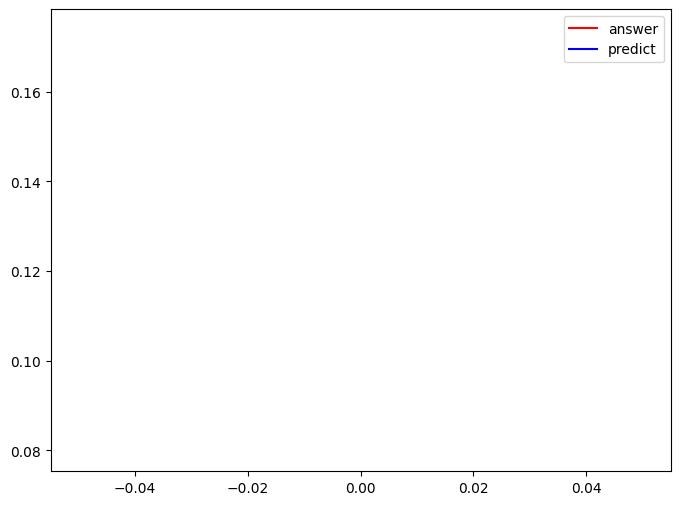

In [41]:
plt.plot(answer_list[0], color = 'r', label = 'answer')
plt.plot(predict_list[0], color = 'b', label = 'predict')

plt.legend()
plt.show()

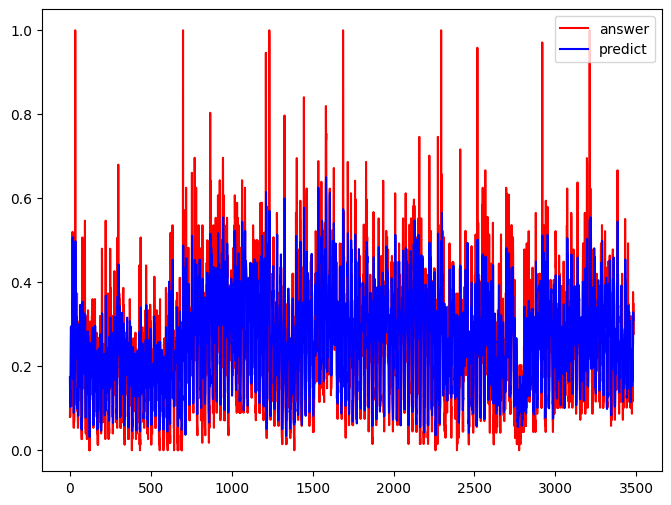

In [42]:
plt.plot(answer, color = 'r', label = 'answer')
plt.plot(predict, color = 'b', label = 'predict')

plt.legend()
plt.show()

In [43]:
a = answer
b = predict
print(mae(a, b).numpy())
print(mse(a, b).numpy()) 
print(r2_score(a, b))
print(RMSE(a, b))

0.07538705
0.01085626
0.4990382305573583
0.10419337000284008


In [44]:
mae_list=[]
mse_list=[]
r2_list=[]
rmse_list=[]
for x, y in val_data_multi.take(10):
  a = y[0].numpy()
  b = model.predict([x, x])[0]
  r2 = r2_score(a, b)
  r2_list.append(r2)
  mae_take = mae(a, b).numpy()
  mse_take = mse(a, b).numpy()
  rmse_take = RMSE(a, b)
  rmse_list.append(rmse_take)
  print(mse_take)
  mae_list.append(mae_take)
  mse_list.append(mse_take)
  dif = pd.DataFrame()
  dif['정답'] = a
  dif['오답'] = b
  dif['오차'] = dif['정답'] - dif['오답']
  dif['퍼센트'] = dif['오차']/dif['정답'] * 100
  print(dif)
  multi_step_plot(x[0], y[0], b)


NameError: name 'val_data_multi' is not defined

In [40]:
print(f"예측 오차 mae 평균 = {np.mean(mae_list)}")
print(f"예측 오차 mae 분산 = {np.std(mae_list)}")
print(f"예측 오차 mse 평균 = {np.mean(mse_list)}")
print(f"예측 오차 mse 분산 = {np.std(mse_list)}")

예측 오차 mae 평균 = 0.08032113313674927
예측 오차 mae 분산 = 0.019694937393069267
예측 오차 mse 평균 = 0.010566139593720436
예측 오차 mse 분산 = 0.0046090250834822655


In [41]:
r2_list

[0.21789661545219485,
 -0.07120443766333451,
 0.658651243859956,
 0.5608855885007711,
 -0.31634790851824857,
 -0.25375135676832383,
 -0.6530815895959594,
 0.21789661545219485,
 -0.07120443766333451,
 0.658651243859956]

In [42]:
print(np.mean(r2_list))
print(np.mean(rmse_list))

0.09483915769158721
0.10038079194322228


In [43]:
list = [-1.9778858662946495, -0.1633887116441386, -0.1209837864626484, 0.2073691429826886, 0.1268809787137054, -0.07710019647807553, 0.6057543879438553, 0.0743316185523103,0.5336820957571533, -0.5862421431794289]
np.mean(list)

-0.13775824801092282

In [44]:
mae_list=[]
mse_list=[]
r2_list=[]
predict = model.predict([x_val_multi, x_val_multi])
answer = y_val_multi
for i in range(0, 100):
    c = answer[i]
    d = predict[i]
    r2 = r2_score(c, d)
    r2_list.append(r2)
    mae_take = mae(c, d).numpy()
    mse_take = mse(c, d).numpy()
    print(mse_take)
    mae_list.append(mae_take)
    mse_list.append(mse_take)
    dif = pd.DataFrame()
    dif['정답'] = c
    dif['오답'] = d
    dif['오차'] = dif['정답'] - dif['오답']
    dif['퍼센트'] = dif['오차']/dif['정답'] * 100
    print(dif)
    #plt.plot(range(0,12), d, label = 'predict')
    #plt.plot(range(0, 12), c, label = 'answer')
    #plt.legend()
    #plt.show()
    #multi_step_plot(z[0], k[0], b)

1/7 [===>..........................] - ETA: 0s

7/7 [==============================] - 0s 7ms/step
0.013312173
          정답        오답        오차         퍼센트
0   0.120000  0.242335 -0.122335 -101.945429
1   0.200000  0.221567 -0.021567  -10.783622
2   0.320000  0.174359  0.145641   45.512922
3   0.040000  0.107213 -0.067213 -168.031862
4   0.026667  0.071485 -0.044818 -168.068910
5   0.026667  0.079008 -0.052341 -196.278987
6   0.013333  0.114967 -0.101634 -762.252638
7   0.026667  0.140566 -0.113899 -427.122021
8   0.000000  0.080132 -0.080132        -inf
9   0.306667  0.122826  0.183840   59.947894
10  0.360000  0.137776  0.222224   61.728863
11  0.226667  0.196109  0.030558   13.481312
0.011453155
          정답        오답        오차         퍼센트
0   0.200000  0.163418  0.036582   18.291241
1   0.320000  0.180478  0.139522   43.600507
2   0.040000  0.039023  0.000977    2.442917
3   0.026667  0.052842 -0.026175  -98.155874
4   0.026667  0.041646 -0.014980  -56.173185
5   0.013333  0.092697 -0.079364 -595.230644
6   0.026667  0.137934 -0